# Clustering Crypto

In [57]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Fetching Cryptocurrency Data

In [58]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [59]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.

In [60]:
# Alternatively, use the provided csv file:
# file_path = Path("Resources/crypto_data.csv")
from pathlib import Path
# Create a DataFrame
crypto_df = pd.read_csv(
    Path('Resources/crypto_data.csv'),
    infer_datetime_format =True,
    parse_dates=True,
)
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

### Data Preprocessing

In [61]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
crypto_df_clean = crypto_df.drop(['Unnamed: 0'], axis =1)
crypto_df_clean

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015 coin,X11,True,PoW/PoS,NaN,0
7,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [62]:
# Keep only cryptocurrencies that are trading ['IsTrading']
crypto_df_clean = crypto_df_clean.drop(crypto_df_clean[crypto_df_clean.IsTrading == False].index)
crypto_df_clean

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015 coin,X11,True,PoW/PoS,NaN,0
7,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [63]:
# Remove the "IsTrading" column
crypto_df_clean = crypto_df_clean.drop(['IsTrading'], axis =1)
crypto_df_clean

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
6,2015 coin,X11,PoW/PoS,NaN,0
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
9,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [64]:
# Remove rows with at least 1 null value by setting df = nonna values using .notna()
crypto_df_na_clean = crypto_df_clean[crypto_df_clean['TotalCoinsMined'].notna()]
crypto_df_na_clean

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
9,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [65]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df_na_clean = crypto_df_na_clean.drop(crypto_df_na_clean[crypto_df_na_clean.TotalCoinsMined == 0].index)
crypto_df_na_clean

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
9,Litecoin,Scrypt,PoW,6.303924e+07,84000000
10,Dash,X11,PoW/PoS,9.031294e+06,22000000
11,Monero,CryptoNight-V7,PoW,1.720114e+07,0
12,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
13,ZCash,Equihash,PoW,7.383056e+06,21000000


In [67]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coin_name = crypto_df_na_clean['CoinName']
coin_name

0                42 Coin
2                404Coin
5              EliteCoin
7                Bitcoin
8               Ethereum
9               Litecoin
10                  Dash
11                Monero
12      Ethereum Classic
13                 ZCash
14             Bitshares
15              DigiByte
16           BitcoinDark
19               PayCoin
20           ProsperCoin
24              KoboCoin
27            Spreadcoin
37              Argentum
39           Aurora Coin
42              BlueCoin
44            MyriadCoin
45              MoonCoin
46              ZetaCoin
47               SexCoin
48               Quatloo
49            EnergyCoin
50             QuarkCoin
51               Riecoin
52          Digitalcoin 
54                BitBar
              ...       
1185          XiaoMiCoin
1186         Groestlcoin
1187           CapriCoin
1188            ClubCoin
1189              Radium
1190                Bata
1191             Pakcoin
1192          Creditbit 
1193              OKCash


In [68]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df_na_clean = crypto_df_na_clean.drop(['CoinName'], axis =1)
crypto_df_na_clean.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [69]:
# Create dummy variables for text features
x = pd.get_dummies(crypto_df_na_clean, columns=['Algorithm', 'ProofType'])
x

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Standardize data
x_scaled = StandardScaler().fit_transform(x)
x

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reducing Dimensions Using PCA

In [71]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_scaled)

In [72]:
# Create a DataFrame with the principal components data
x_pca = pd.DataFrame(
    data=x_pca, columns=["PC1", "PC2","PC3"]
)
x_pca.head()

,PC1,PC2,PC3
0,-0.327410,1.018616,-0.439953
1,-0.310672,1.019169,-0.440069
2,2.309226,1.657666,-0.580645
3,-0.145782,-1.320392,0.083142
4,-0.145659,-1.977663,0.267272


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [73]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

Running K-Means with `k=<your best value for k here>`

In [88]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=5)
# Fit the model
model.fit(x_pca)
# Predict clusters
predictions = model.predict(x_pca)
print(predictions)
x_pca["class"] = model.labels_
x_pca.head()
# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df = pd.concat([crypto_df_na_clean, x_pca, coin_name], join = 'outer', axis = 1) 
clustered_df.dropna()

[0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0
 1 1 0 1 1 1 1 0 3 3 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 0 0 0 0 1 0 0 1 0 0 1 3 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 1 0 

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,class,CoinName
0,Scrypt,PoW/PoS,4.199995e+01,42,-0.327410,1.018616,-0.439953,0.0,42 Coin
2,Scrypt,PoW/PoS,1.055185e+09,532000000,2.309226,1.657666,-0.580645,0.0,404Coin
5,X13,PoW/PoS,2.927942e+10,314159265359,-0.151525,-1.094763,0.063706,1.0,EliteCoin
7,SHA-256,PoW,1.792718e+07,21000000,-0.149821,-2.213459,0.329817,1.0,Bitcoin
8,Ethash,PoW,1.076842e+08,0,-0.144093,-1.977722,0.267279,1.0,Ethereum
9,Scrypt,PoW,6.303924e+07,84000000,-0.161183,-2.216045,0.196125,1.0,Litecoin
10,X11,PoW/PoS,9.031294e+06,22000000,-0.283945,1.529351,0.028981,0.0,Dash
11,CryptoNight-V7,PoW,1.720114e+07,0,0.170676,-1.835857,0.277214,1.0,Monero
12,Ethash,PoW,1.133597e+08,210000000,-0.320492,0.792993,-0.420520,0.0,Ethereum Classic
13,Equihash,PoW,7.383056e+06,21000000,-0.270857,0.606032,-0.158153,0.0,ZCash


### Visualizing Results

#### 3D-Scatter with Clusters

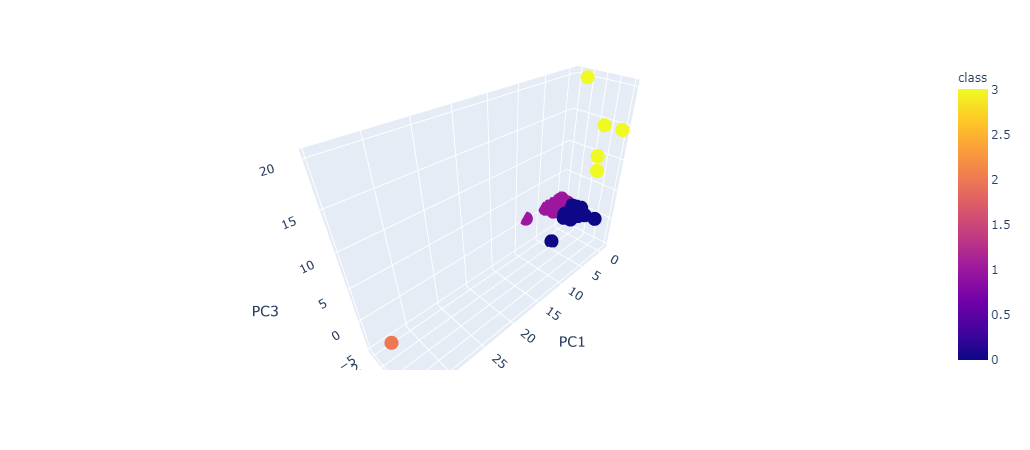

In [98]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color= "class",
    hover_name="CoinName",
    hover_data=["Algorithm"],
    #width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [101]:
# Table with tradable cryptos
crypto_tbl = clustered_df.hvplot.table(columns=["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "class"], sortable=True, selectable=True)

In [102]:
# Print the total number of tradable cryptocurrencies
crypto_tbl

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

#### Scatter Plot with Tradable Cryptocurrencies

In [103]:
# Scale data to create the scatter plot
scatter_plt = clustered_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", hover_cols=["CoinName"])

In [104]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
scatter_plt

:Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)